In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import pickle
import re

In [4]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t', quoting=3)

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
df.shape

(3150, 5)

In [10]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

Text(0, 0.5, 'Count')

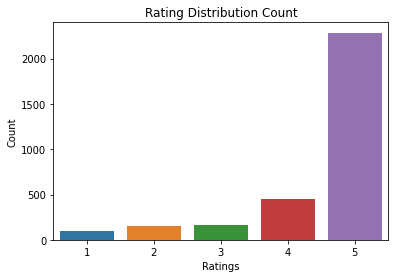

In [11]:
sns.barplot(x = df['rating'].unique(), y = df['rating'].value_counts())
plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')

In [ ]:
#Finding the percentage distribution of each rating

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


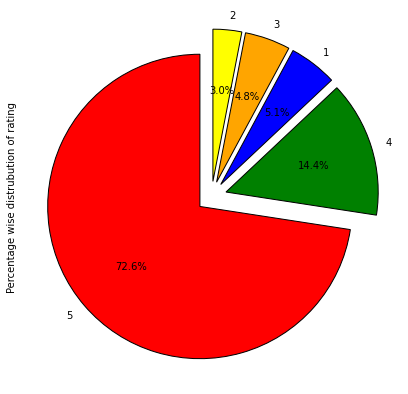

In [15]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['rating'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [114]:
print(f"Feedback value count: \n{df['feedback'].value_counts()}")


Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [115]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [116]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


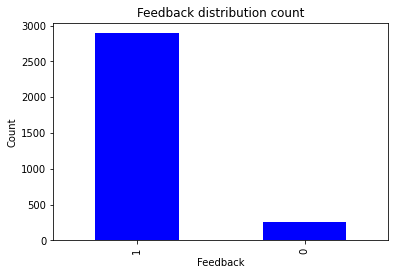

In [117]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [118]:
print(f"Feedback value count - percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


<AxesSubplot:ylabel='Percentage wise distrubution of feedback'>

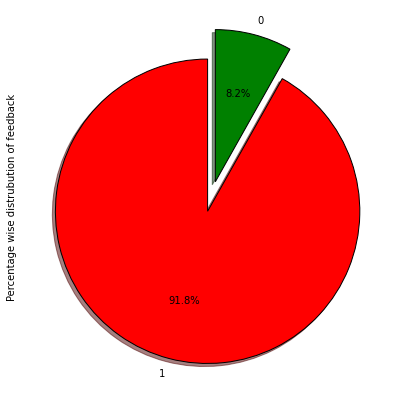

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['feedback'].value_counts()/df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [120]:
df[df['feedback'] == 0]['rating'].value_counts()


1    161
2     96
Name: rating, dtype: int64

In [121]:
df[df['feedback'] == 1]['rating'].value_counts()


5    2286
4     455
3     152
Name: rating, dtype: int64

In [122]:
print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


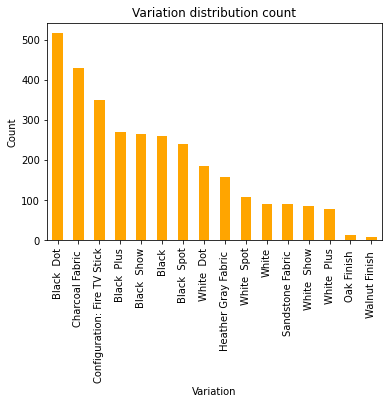

In [123]:
df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [124]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

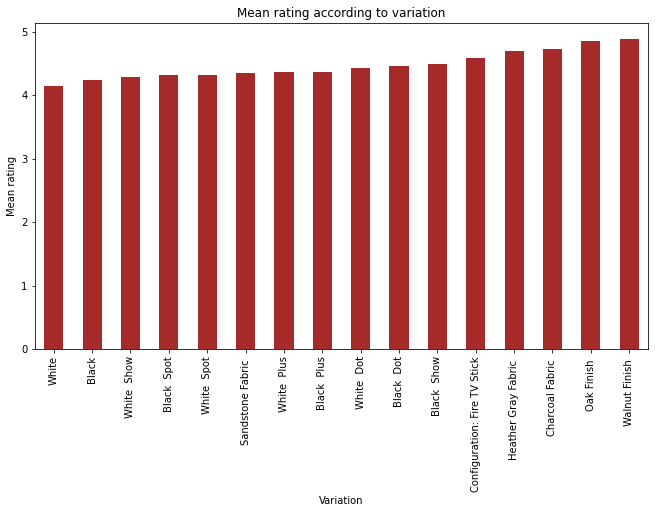

In [125]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [126]:
negative_reviews = df[df['feedback']==0]

In [127]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [128]:
len(negative_reviews)

257

In [129]:
from sklearn.utils import resample

In [130]:
negative_upsampled = resample(negative_reviews, replace=True, n_samples=2893, random_state=42)

In [131]:
negative_upsampled

,rating,date,variation,verified_reviews,feedback
1309,1,22-Jul-18,Black Spot,"""I own 3 of these... amazon is ignoring its c...",0
1348,1,19-Jul-18,Black Spot,Can't turn of &#34;things to try&#34; on the s...,0
1036,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0
2221,1,30-Jul-18,Configuration: Fire TV Stick,,0
394,2,22-Jul-18,White,"""Initially, this echo dot worked very well. Ov...",0
...,...,...,...,...,...
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0
2098,1,29-Jun-18,Black Plus,"""Got this a few months ago with the idea that ...",0
2979,1,30-Jul-18,White Dot,,0
1398,1,15-Jul-18,Black Spot,"""I love the product , but very disappointed on...",0


In [132]:
balanced_df = pd.concat([df, negative_upsampled])

In [133]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [134]:
balanced_df.shape

(6043, 5)

In [135]:
balanced_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,30-Jul-18,Black Dot,"""Too soon, I'm still learning what I can do wi...",1
1,5,29-Jul-18,Black Plus,The speakers on these devices are surprisingly...,1
2,1,1-Jul-18,White,"""This item did not work. Certified refurbished...",0
3,2,15-Jun-18,Black,The echo dot disconnects from the speaker abou...,0
4,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0


In [136]:
corpus = []
stemmer = PorterStemmer()
for i in range(len(balanced_df)):
    review = re.sub('[^a-zA-Z]', ' ', balanced_df['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(corpus).toarray()
y = balanced_df['feedback'].values

In [138]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [139]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (6043, 2500)
y shape: (6043,)


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (4834, 2500)
y train: (4834,)
X test: (1209, 2500)
y test: (1209,)


In [141]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 6


In [142]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Saving the scaler model
pickle.dump(scaler, open('Models/Mscaler.pkl', 'wb'))

In [144]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [145]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scaled, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scaled, y_test))

Training Accuracy : 0.9873810508895324
Testing Accuracy : 0.9710504549214226


In [ ]:
y_preds = model_rf.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

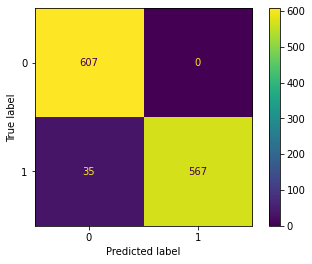

In [148]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [149]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [150]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scaled, y = y_train, cv = skf)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9768274215902675
Standard Variance : 0.00784811613058536


In [151]:
pickle.dump(model_rf, open('Models/randomforest.pkl', 'wb'))